In [698]:
import sympy as smp
import numpy as np

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])

In [699]:
data = planilha_cartolina = pd.read_excel('./dados.xlsx')
g = 9.81
d = 1*1e-3
b_l = 25.25*1e-3
F = 456.7*1e-3*g

x_data = data["L(0,1cm).1"][0:12]
y_data = data["x(0,1cm).1"][0:12]

x_err = 0.1e-2
y_err = 0.1e-2

x_data = (x_data)*1e-2
y_data = (y_data -2.7)*1e-2

x_data = x_data
y_data = y_data

data

,"x(0,1cm)",F,"L(0,1cm)","∆L(0,5cm)",m,"(0,01g)",Unnamed: 6,"L(0,1cm).1","x(0,1cm).1",Unnamed: 9,"d(0,01mm)","b(0,05mm)"
0,2.9,0.0,"29,0m","2,5mm",0.0,0.0,NaN,29,10.5,NaN,0.1,25.25
1,4.1,1.0,NaN,NaN,1.0,65.6,NaN,28,9.7,NaN,NaN,NaN
2,4.9,2.0,NaN,NaN,2.0,109.3,NaN,27,9.0,NaN,NaN,NaN
3,5.6,3.0,NaN,NaN,3.0,151.5,NaN,26,8.5,NaN,NaN,NaN
4,6.4,4.0,NaN,NaN,4.0,194.1,NaN,25,7.8,NaN,NaN,NaN
5,7.1,5.0,NaN,NaN,5.0,236.4,NaN,24,7.2,NaN,NaN,NaN
6,7.8,6.0,NaN,NaN,6.0,280.0,NaN,23,6.6,NaN,NaN,NaN
7,8.5,7.0,NaN,NaN,7.0,322.2,NaN,22,6.1,NaN,NaN,NaN
8,9.1,8.0,NaN,NaN,8.0,364.7,NaN,21,5.6,NaN,NaN,NaN
9,9.8,9.0,NaN,NaN,9.0,413.2,NaN,20,5.2,NaN,NaN,NaN


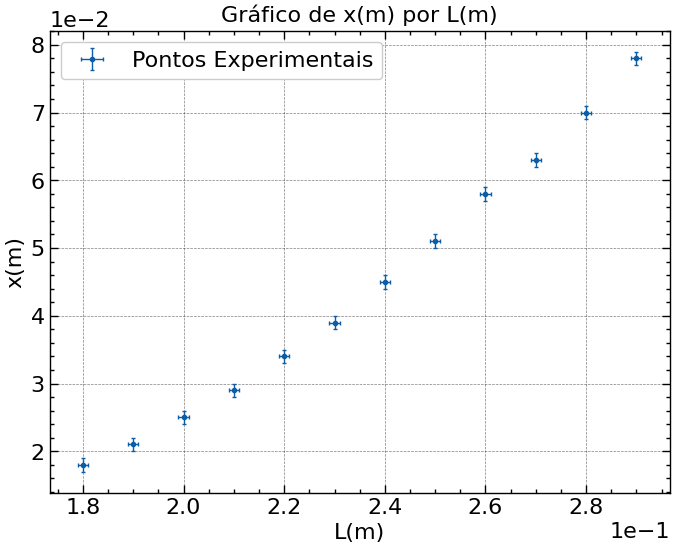

In [700]:
#plot dos pontos

plt.errorbar(x_data, y_data, xerr = x_err, yerr = y_err, marker = 'o', ls = '', ms = 3,capsize=1.5, elinewidth=1, label ="Pontos Experimentais")
plt.title('Gráfico de x(m) por L(m)')

plt.xlabel(r'L(m)')
plt.ylabel(r'x(m)')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()

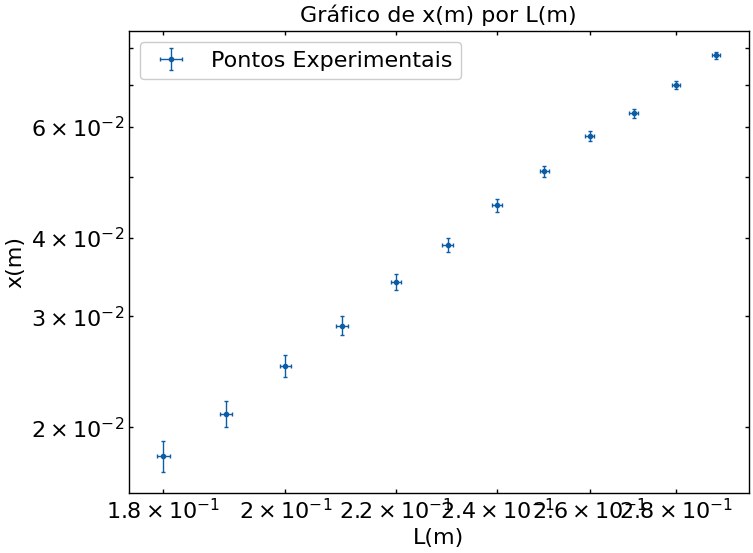

In [701]:
#grafico log-log

plt.errorbar(x_data, y_data, xerr = x_err, yerr = y_err, marker = 'o', ls = '', ms = 3, capsize=1.5, elinewidth=1, label ="Pontos Experimentais")
plt.title('Gráfico de x(m) por L(m)')

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'L(m)')
plt.ylabel(r'x(m)')


plt.legend()

In [702]:
def func(x,a, b):
    return a*x**3

popt, pcov = curve_fit(func, x_data, y_data)
a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))
r2 = r2_score(y_data, func(x_data, *popt))

print('a = ', a)
print('b = ', b)
print(r'r^2 =', r2)
print('a_err = ', a_err)
print('b_err = ', b_err)

a =  3.2110332895727063
b =  1.0
r^2 = 0.9985037154352633
a_err =  inf
b_err =  inf


/tmp/ipykernel_30775/1960379244.py:4: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func, x_data, y_data)


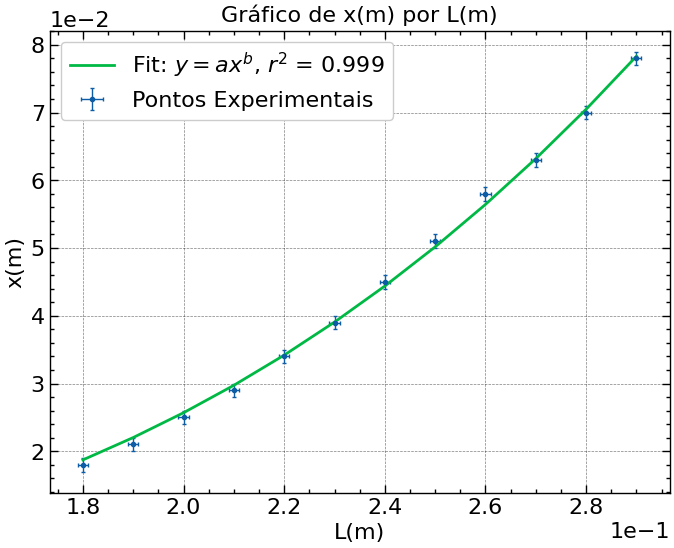

In [703]:
#fit

plt.errorbar(x_data, y_data, xerr = x_err, yerr = y_err, marker = 'o', ls = '', ms = 3, capsize=1.5, elinewidth=1,label ="Pontos Experimentais")
plt.title('Gráfico de x(m) por L(m)')

plt.xlabel(r'L(m)')
plt.ylabel(r'x(m)')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


plt.plot(x_data, func(x_data, *popt), label= r'Fit: $y = ax^b$, $r^2$ = %.3f' % (r2) )
plt.legend()


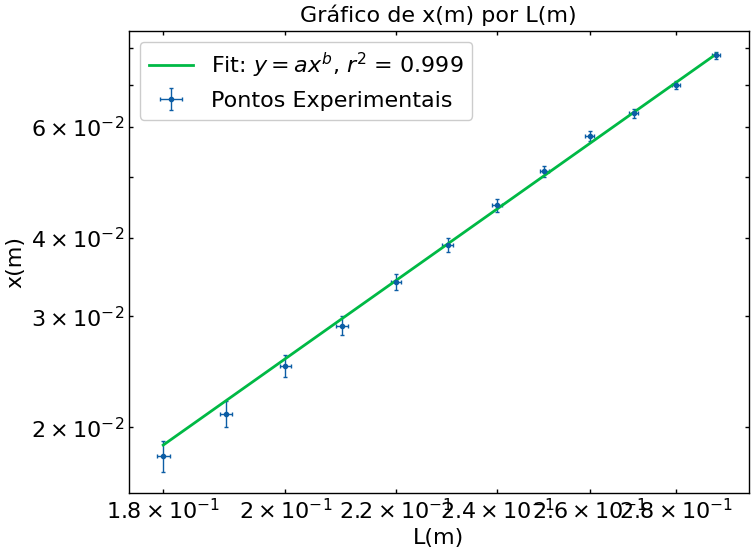

In [704]:
#fit grafico log-log


plt.errorbar(x_data, y_data, xerr = x_err, yerr = y_err, marker = 'o', ls = '', ms = 3, capsize=1.5, elinewidth=1,label ="Pontos Experimentais")
plt.title('Gráfico de x(m) por L(m)')

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'L(m)')
plt.ylabel(r'x(m)')


plt.plot(x_data, func(x_data, *popt), label= r'Fit: $y = ax^b$, $r^2$ = %.3f' % (r2) )
plt.legend()

In [705]:
#cálculo do módulo de young


E = 4*F/(a*d**3*b_l)
print(f'{E:.5e}')

2.21031e+11


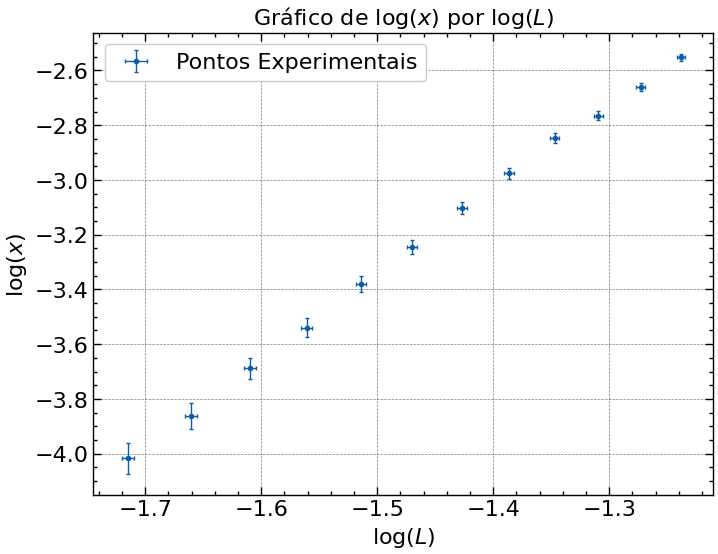

In [706]:
#tomando o log nos dados

x_data_log = np.log(x_data)
y_data_log = np.log(y_data)

#propagação de incertezas
x_err_log = 1/x_data * (x_err)
y_err_log = 1/y_data * (y_err)

plt.errorbar(x_data_log, y_data_log, xerr = x_err_log, yerr = y_err_log, marker = 'o', ls = '', ms = 3,capsize=1.5, elinewidth=1, label ="Pontos Experimentais")
plt.title(r'Gráfico de $\log(x)$ por $\log(L)$')

plt.xlabel(r'$\log(L)$')
plt.ylabel(r'$\log(x)$')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()

In [707]:
#fit

def func(x,a, b):
    return a + 3*x

popt, pcov = curve_fit(func, x_data_log, y_data_log)
a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))
r2 = r2_score(y_data_log, func(x_data_log, *popt))

print('a = ', a)
print('b = ', b)
print(r'r^2 =', r2)
print('a_err = ', a_err)
print('b_err = ', b_err)

a =  1.157952062174003
b =  1.0
r^2 = 0.9978232489395549
a_err =  inf
b_err =  inf


/tmp/ipykernel_30775/3420409196.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func, x_data_log, y_data_log)


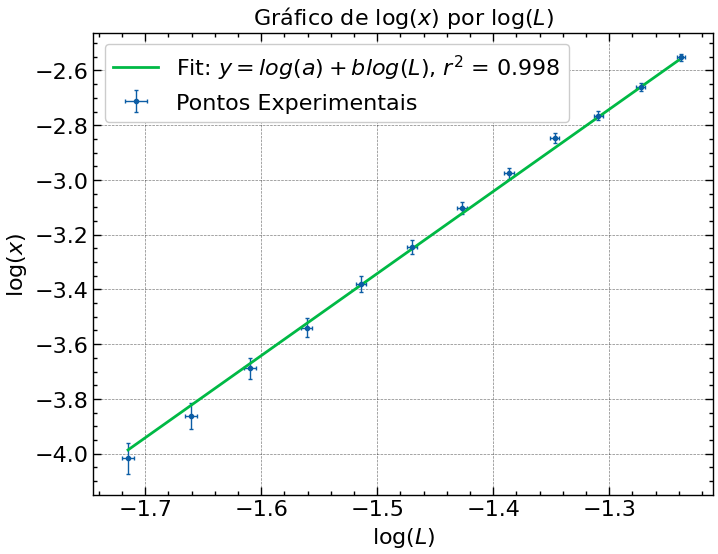

In [708]:
plt.errorbar(x_data_log, y_data_log, xerr = x_err_log, yerr = y_err_log, marker = 'o', ls = '', ms = 3,capsize=1.5, elinewidth=1, label ="Pontos Experimentais")
plt.title(r'Gráfico de $\log(x)$ por $\log(L)$')

plt.xlabel(r'$\log(L)$')
plt.ylabel(r'$\log(x)$')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.plot(x_data_log, func(x_data_log, *popt), label= r'Fit: $y = log(a) + blog(L)$, $r^2$ = %.3f' % (r2) )
plt.legend()

In [709]:

E = 4*F/(np.exp(a)*d**3*b_l)
print(f'{E:.5e}')

2.22949e+11
